In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import root_mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
print("listo")

listo


In [4]:
#### Comparativa por buffer


def linear_regression_plot (path, date_format,nrows,ncols, plot, resolucion_espaciotemporal,color_maiac_61,color_maiac_60,edge_color_maiac_60,edge_color_maiac_61):
    '''
    La función permite graficar la regresión lineal de cada estación AERONET.
    Además, se muestran las estadísticas principales y la ecuación de la regresión lineal.
    Los datos de cada estación de interés se encuentran en una carpeta en formato .csv previamente procesados.
    La función recorre la carpeta y toma cada uno de estos archivos para generar el gráfico correspondiente.

    Variables:
    - path: ruta a la carpeta donde se encuentran los archivos en formato .csv
    - date_format: formato de la columna de fecha del archivo de interés.
    Por ejemplo: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: número de filas que tendrá el gráfico
    - ncols: número de columnas que tendrá el gráfico
    - paleta de colores para las estaciones MAIAC-MODIS. Por ejemplo:
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''

    i=0 
    j=0 


    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        station_name = files [2:4]

        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        
        ########################                VARIABLES                ########################
        #Separar en diferntes dataframe segun el producto C6.0 vs C6.1
        df_60 = data[['date', 'AOD_550_maiac_mean_60', 'AOD_550_AER_mean_60']]
        y_maiac_60= df_60["AOD_550_maiac_mean_60"]
        x_aer_60 = df_60['AOD_550_AER_mean_60']
        ##
        df_61 = data[['date', 'AOD_550_maiac_mean_61', 'AOD_550_AER_mean_61']]
        y_maiac_61= df_61["AOD_550_maiac_mean_61"]
        x_aer_61 = df_61['AOD_550_AER_mean_61']
        #Mascara para cada uno de los datasets para comparalos
        ##60
        mask_60 = ~np.isnan(x_aer_60) & ~np.isnan(y_maiac_60)
        x_aer_60 = x_aer_60[mask_60]
        y_maiac_60 = y_maiac_60[mask_60]

        ##61
        mask_61 = ~np.isnan(x_aer_61) & ~np.isnan(y_maiac_61)
        x_aer_61 = x_aer_61[mask_61]
        y_maiac_61 = y_maiac_61[mask_61]
        
       
        # #numero de datos sin contar los NaNs
        n_60 = len(x_aer_60)
        n_61 = len(x_aer_61)
        #e, la ordenada al origen y el R2
        slope_maiac_60 , intercept_maiac_60 , r_maiac_60 , p_maiac_60 , stderr_maiac_60  = scipy.stats.linregress(x_aer_60 , y_maiac_60)
        slope_maiac_61 , intercept_maiac_61 , r_maiac_61 , p_maiac_61 , stderr_maiac_61  = scipy.stats.linregress(x_aer_61 , y_maiac_61)
               
        # R2
        R2_maiac_60 =r_maiac_60*r_maiac_60
        R2_maiac_61 =r_maiac_61*r_maiac_61
        



        RMSE_maiac_60= root_mean_squared_error(y_maiac_60, x_aer_60)
        RMSE_maiac_61 = root_mean_squared_error(y_maiac_61, x_aer_61)

        RMSE_maiac_normalize_60 = round(RMSE_maiac_60/(x_aer_60.mean()),3)
        RMSE_maiac_normalize_61 = round(RMSE_maiac_61/(x_aer_61.mean()),3)



        #Bias
        bias_maiac_60 = round(( sum(y_maiac_60 - x_aer_60)/n_60),3)
        bias_maiac_61 = round(( sum(y_maiac_61 - x_aer_61)/n_61),3)

        

        ########################                PREDICT                ########################
        
        # Generar las regresiones lineales con la info de interes
        y_maiac_p_60 = y_maiac_60.values.reshape(-1,1)
        x_p_60 = x_aer_60.values.reshape(-1,1)
        ##
        y_maiac_p_61= y_maiac_61.values.reshape(-1,1)
        x_p_61 = x_aer_61.values.reshape(-1,1)
        

        ######
        linear_regresion_maiac_60 = LinearRegression()
        linear_regresion_maiac_60.fit(x_p_60,y_maiac_p_60)
        li_predict_maiac_60= linear_regresion_maiac_60.predict(x_p_60)
        ##
        linear_regresion_maiac_61 = LinearRegression()
        linear_regresion_maiac_61.fit(x_p_61,y_maiac_p_61)
        li_predict_maiac_61 = linear_regresion_maiac_61.predict(x_p_61)
        ##


        #### 
       
         ########################                PLOT                ########################

        ax[i][j].plot(x_p_60,li_predict_maiac_60,c=color_maiac_60[p],linestyle="-",linewidth=2.5)#azul
        ax[i][j].plot(x_p_61,li_predict_maiac_61,c=color_maiac_61[p],linestyle="-",linewidth=2.5)#verde
        ax[i][j].scatter(x_p_60, y_maiac_p_60,  c=color_maiac_60[p],edgecolors=edge_color_maiac_60[p] ,alpha=0.5,  s=25,label="C6.0")
        #
        ax[i][j].scatter(x_p_60, y_maiac_p_61,  c=color_maiac_61[p] ,edgecolors=edge_color_maiac_61[p] ,alpha=0.5,  s=25,label="C6.1")

        ax[i][j].set_xlim(0, 1.8)
        ax[i][j].set_ylim(0, 1.8)
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax[i][j].xaxis.set_ticks(np.arange(0.2, 1.85, 0.4))

        #Metricas comparativas de C6.0 C6.1
        ax[i][j].text(0.03, 1.6, "C6.0 =" , fontsize=14, ha="left", va="bottom", fontweight = "bold")
        ax[i][j].text(0.03, 1.45, "C6.1 =", fontsize=14, ha="left", va="bottom",fontweight = "bold")
        ax[i][j].text(0.37, 1.6, (str(round (intercept_maiac_60,2)) + " + "+ str(round (slope_maiac_60,2)) + " AOD") , fontsize=14, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        ax[i][j].text(0.37, 1.45, (str(round (intercept_maiac_61,2)) + " + "+ str(round (slope_maiac_61,2))+ " AOD") , fontsize=14, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        
        # Statistics by station
        ax[i][j].text(1.27, 0.68, "C6.0" , fontsize=13, ha="center", va="bottom", fontweight = "bold")
        ax[i][j].text(1.60, 0.68, "C6.1" , fontsize=13, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(0.85, 0.55, r'$R^{2}$ ', fontsize=14, ha="left", va="center")
        ax[i][j].text(0.85, 0.40, r'$RMSE$ ',fontsize=14,ha="left", va="center")
        ax[i][j].text(0.85, 0.25, r'$Bias$', fontsize=14,ha="left", va="center")
        ax[i][j].text(0.85, 0.1, r'$n$    ', fontsize=14,ha="left", va="center")


        ax[i][j].text(1.15, 0.55,(round(R2_maiac_60,2)) , fontsize=14, ha="left", va="center")
        ax[i][j].text(1.15, 0.40,  (round(RMSE_maiac_60,2)) , fontsize=14,ha="left", va="center")
        ax[i][j].text(1.15, 0.25, (round(bias_maiac_60,2)) , fontsize=14,ha="left", va="center")#,
        ax[i][j].text(1.15, 0.1, n_60 , fontsize=14,ha="left", va="center")
        
        
        ax[i][j].text(1.50, 0.55,(round(R2_maiac_61,2)) , fontsize=14, ha="left", va="center")
        ax[i][j].text(1.50, 0.40,   (round(RMSE_maiac_61,2)) , fontsize=14,ha="left", va="center")
        ax[i][j].text(1.50, 0.25,  (round(bias_maiac_61,2)), fontsize=14,ha="left", va="center")#,
        ax[i][j].text(1.50, 0.1,  n_61 , fontsize=14,ha="left", va="center")
        
            
        #Titulo de las estaciones AERONET
        ax[i][j].set_title(station_name,fontsize=16,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})

        # Axes names
        ax[0][0].set_xlabel(r'',size=10)
        ax[0][1].set_xlabel(r'',size=10)
        ax[0][2].set_xlabel(r'',size=10)
        ax[1][0].set_xlabel(r'$AOD_{AERONET}$',size=17)
        ax[1][1].set_xlabel(r'$AOD_{AERONET}$',size=17)
        ax[1][2].set_xlabel(r'$AOD_{AERONET}$',size=17)
        
        
        ax[0][1].set_ylabel(r'$AOD_{SATELLITE}$',size=17)
        ax[0][1].set_ylabel(r'',size=17)
        ax[0][2].set_ylabel(r'',size=17)
        ax[1][0].set_ylabel(r'$AOD_{SATELLITE}$',size=17)
        ax[1][1].set_ylabel(r'',size=17)
        ax[1][2].set_ylabel(r'',size=17)
        
        print(f'{station_name} ==> R C60 =  {round(r_maiac_60,3)}, R C61 =  {round(r_maiac_61,3)}')

        #Probar ubicacion/ajustes de los subplots
        plt.subplots_adjust(left=0.01,#0.125,
                            bottom=0.01,#0.1, 
                            right=0.99,#0.9, 
                            top=0.99,#0.9, 
                            wspace=0.2, 
                            hspace=0.25)#0.4)

        ax[i][j].legend(frameon=True, 
                      markerfirst=True, 
                      fontsize=13, 
                      loc='upper right', 
                      borderpad=0.2,  # Reduce el tamaño del recuadro
                      borderaxespad=0.22)

                #Linea 1:1:
        x_linea11 = np.linspace(0, 5,10)  # Genera 100 puntos entre 0 y 10
        y_linea11 = x_linea11
        ax[i][j].plot(x_linea11,y_linea11,c="#636363",linestyle="--",linewidth=1.3)#azul
        ax[i][j].tick_params(axis='both', which='major', labelsize=13)  
        
        
        ax[0][1].text(1.50, 0.55,("0.70") , fontsize=14, ha="left", va="center")
        ax[1][1].text(1.50, 0.55,("0.30") , fontsize=14, ha="left", va="center")
        ax[1][2].text(1.15, 0.55,("0.60") , fontsize=14, ha="left", va="center")
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
# Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("D:/Josefina/Congresos/EGU_2024/plots_02/linear_regression_plot_EU.jpg", dpi=500))
    else:
        return(plt.show())



0
SP ==> R C60 =  0.909, R C61 =  0.913
1
ST ==> R C60 =  0.81, R C61 =  0.835
2
BA ==> R C60 =  0.626, R C61 =  0.62
3
MD ==> R C60 =  0.718, R C61 =  0.581
4
LP ==> R C60 =  0.568, R C61 =  0.544
5
MX ==> R C60 =  0.777, R C61 =  0.832


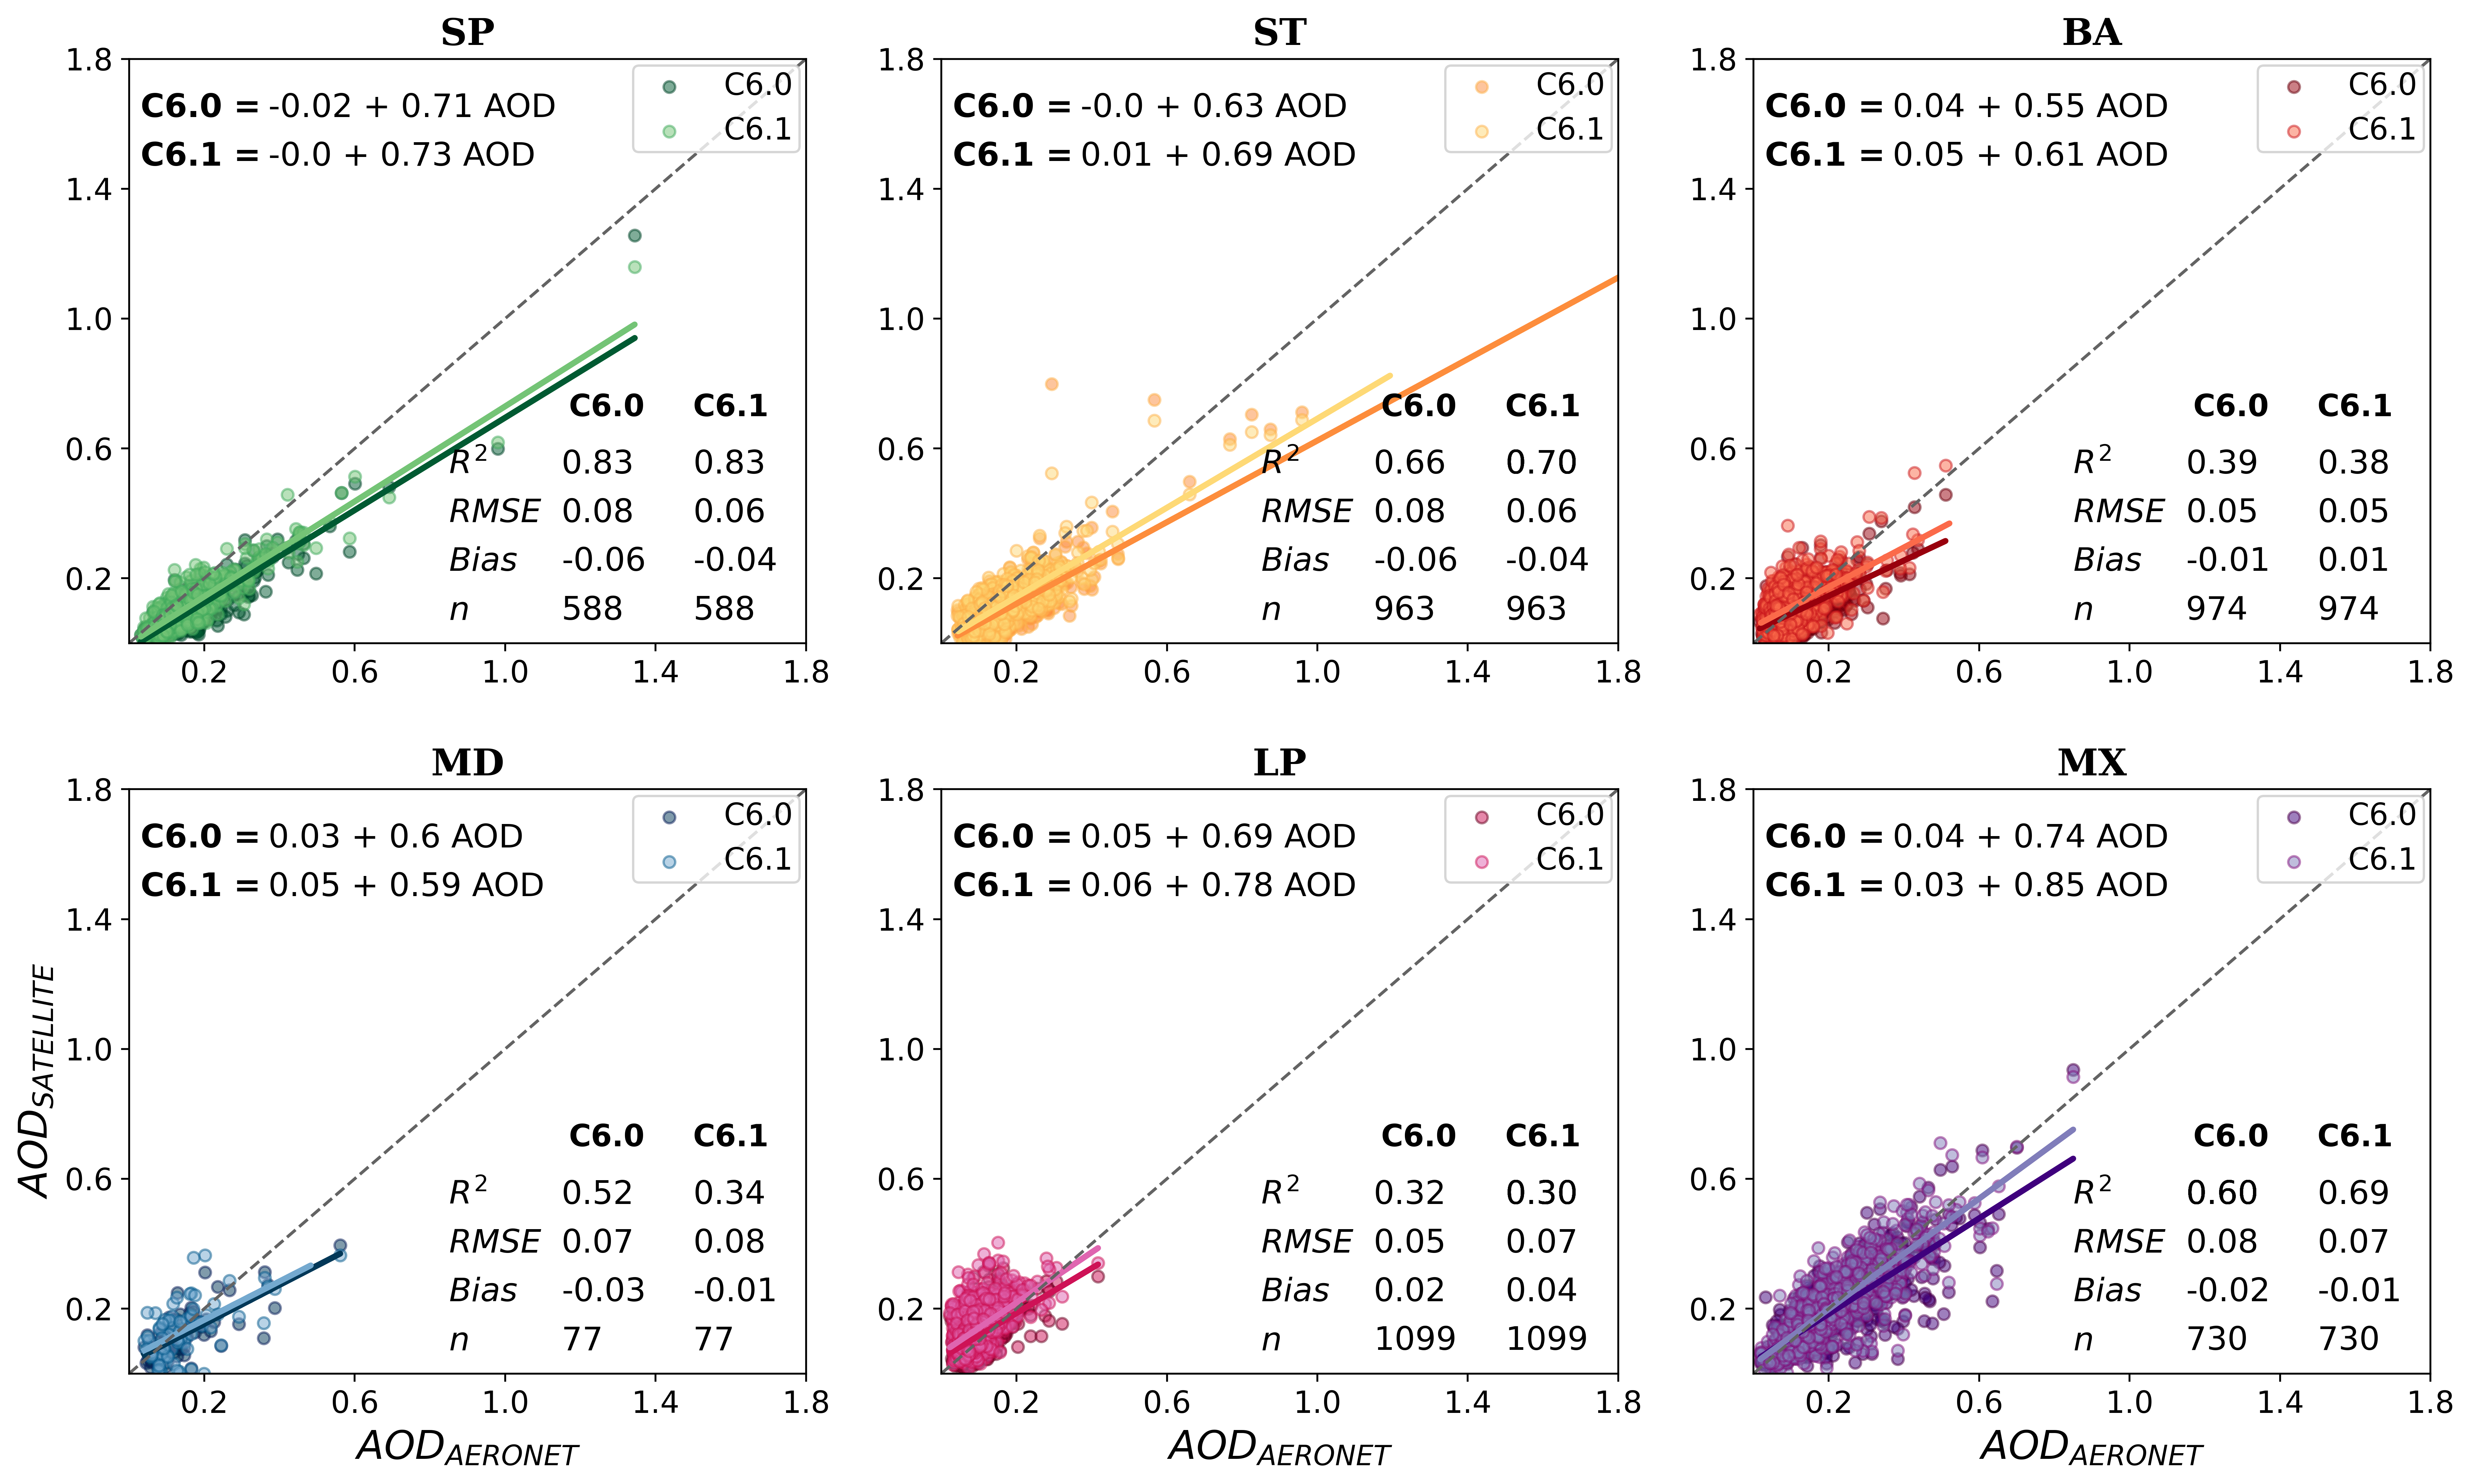

In [ ]:
# Generacion plot comparativa MAIAC C6.0 vs C6.1 para los 30 mins

date_format='%d/%m/%Y'
nrows=2
ncols=3
plot='no'
color_maiac_61 = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac_60 = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
edge_color_maiac_60 = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
edge_color_maiac_61 = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
#resolucion_espaciotemporal = "Comparativa Collection 60min-1km - Dia Latam"
resolucion_espaciotemporal = ""
dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_C60C61/Latam"
regresion = linear_regression_plot (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dir_path_latam,date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_61=color_maiac_61,color_maiac_60=color_maiac_60,edge_color_maiac_60=edge_color_maiac_60,edge_color_maiac_61=edge_color_maiac_61)


0
1
2
3
4
5


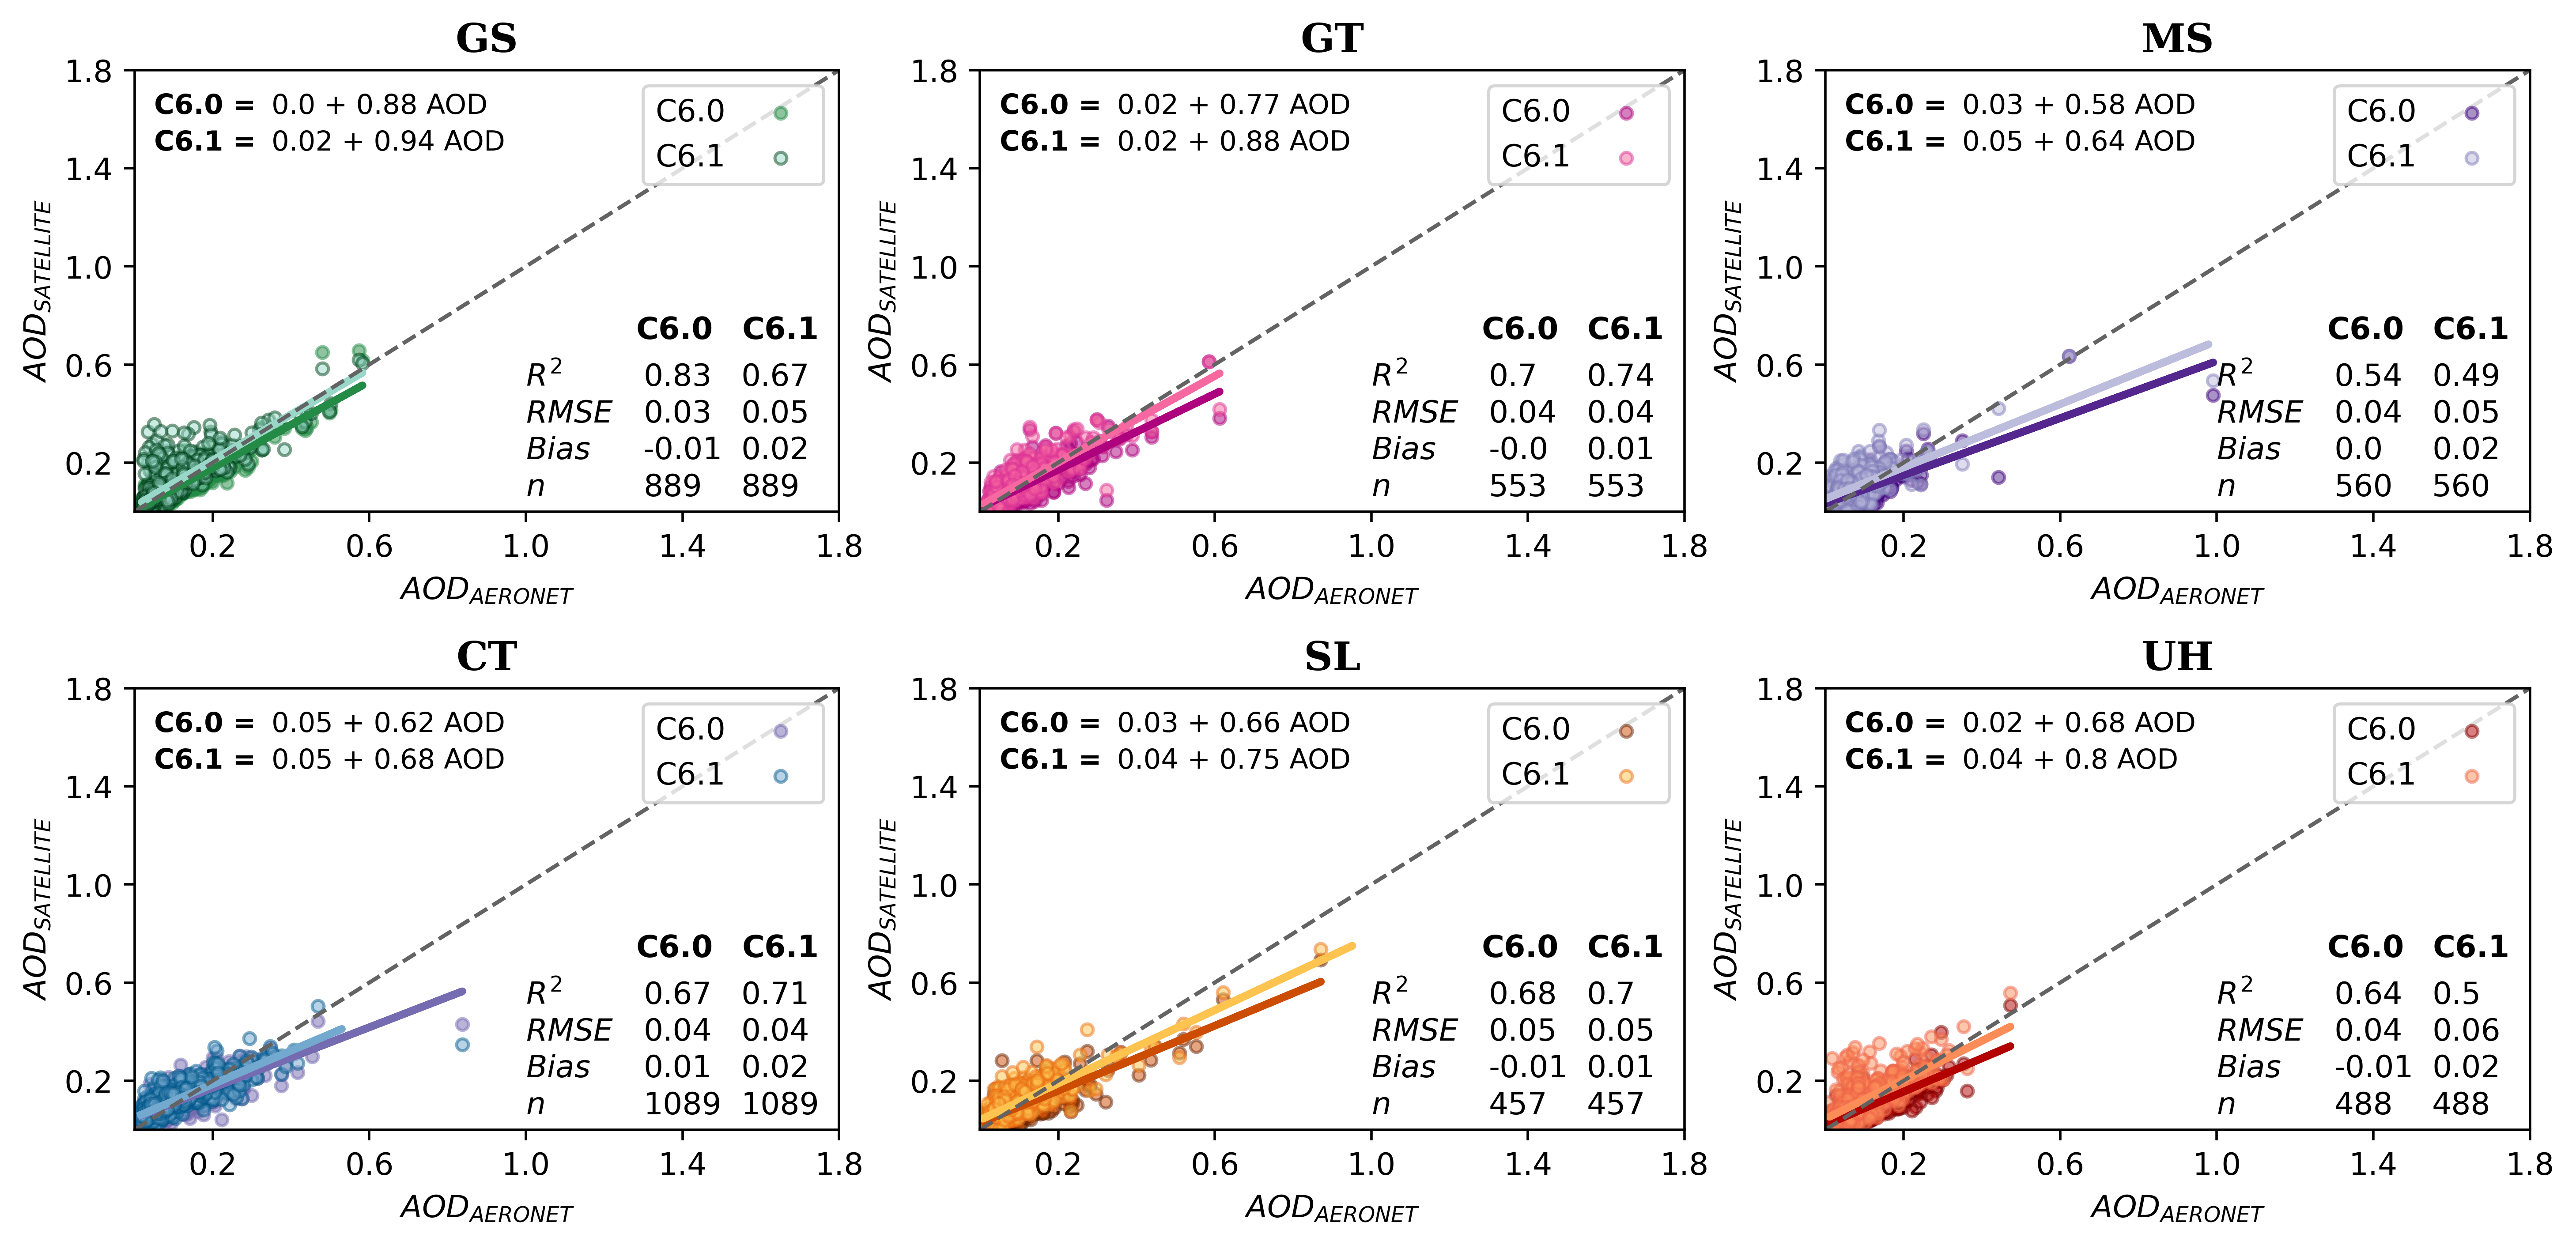

In [48]:
# Regrsion lineal C6
date_format='%d/%m/%Y'
nrows=2
ncols=3
plot='save'
### "Comparativa buffer 30min - Dia"

edge_color_maiac_60 =["#238b45","#ae017e","#3f007d","#756bb1","#662506","#7f0000"]#######
color_maiac_60 = ["#238b45","#ae017e","#54278f","#756bb1","#cc4c02","#b30000"]#########"

edge_color_maiac_61 = ["#00441b","#dd3497","#807dba","#045a8d","#ec7014","#ef6548"]
color_maiac_61 = ["#99d8c9","#f768a1","#bcbddc", "#74a9cf","#fec44f","#fc8d59"]

colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"]
#resolucion_espaciotemporal = "Collection 60min-1km  USA"
resolucion_espaciotemporal = ""
dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_C60C61/USA"
regresion = linear_regression_plot (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dir_path_latam,date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_61=color_maiac_61,color_maiac_60=color_maiac_60,edge_color_maiac_60=edge_color_maiac_60,edge_color_maiac_61=edge_color_maiac_61)


# REU

In [9]:
def REU_list(DF,Lambda = 1, u_xi = 0.0):

    #DF = data
    Lambda = 1
    u_xi = 0.0
    Sigma_err_x = u_xi
    # These are lists where I will save the different results
    list_u_1 = []
    list_reu_1 = []
    list_bias_1 = []
    list_noise_1 = []
    list_reux_1 = []
    list_biasx_1 = []
    list_noisex_1 = []
    ##
    list_u_3 = []
    list_reu_3 = []
    list_bias_3 = []
    list_noise_3 = []
    list_reux_3 = []
    list_biasx_3 = []
    list_noisex_3 = []
    list_verificacion_3 = []

    x_1 = DF['AOD_550_AER_mean_60'] #AERONET
    y_1 = DF["AOD_550_maiac_mean_60"] # Pollutant
    ##
    x_3 = DF['AOD_550_AER_mean_61'] #AERONET
    y_3 = DF["AOD_550_maiac_mean_61"] # Pollutant
    ##

    #Masking the NaN's
    mask_1 = ~np.isnan(x_1) & ~np.isnan(y_1)
    x_1 = x_1[mask_1]
    y_1 = y_1[mask_1]
    n_1 = len(x_1)
    ##
    mask_3 = ~np.isnan(x_3) & ~np.isnan(y_3)
    x_3 = x_3[mask_3]
    y_3 = y_3[mask_3]
    n_3 = len(x_3)
    ##
    #Slope & Intercept usando REGRESION LINEAL (LR)
    slope_1, intercept_1, r_1, p_1, stderr_1 = scipy.stats.linregress(x_1[mask_1], y_1[mask_1])
    b1_1 = slope_1
    b0_1 = intercept_1
    #Slope & Intercept usando REGRESION LINEAL (LR)
    slope_3, intercept_3, r_3, p_3, stderr_3 = scipy.stats.linregress(x_3[mask_3], y_3[mask_3])
    b1_3 = slope_3
    b0_3 = intercept_3
    #Equation error variance for y = b0 + b1*x + v_i
    rss_1 = (y_1 - b0_1 - b1_1*x_1)**2
    RSS_1 = rss_1.values.sum()
    Sigma_v_sqr_1 = RSS_1/(n_1-2)
    #Equation error variance for y = b0 + b1*x + v_i
    rss_3 = (y_3 - b0_3 - b1_3*x_3)**2
    RSS_3 = rss_3.values.sum()
    Sigma_v_sqr_3 = RSS_3/(n_3-2)

    #Error variance due to the deviation of the 1:1 line
    ec_1 = (b0_1 + (b1_1 - 1)*x_1)**2
    ran_1 = Sigma_v_sqr_1 - Sigma_err_x**2
    #Error variance due to the deviation of the 1:1 line
    ec_3 = (b0_3 + (b1_3 - 1)*x_3)**2
    ran_3 = Sigma_v_sqr_3 - Sigma_err_x**2
    #Error variance due to the deviation of the 1:1 line

    #Results
    U_1 = ((ran_1  + ec_1 )**(1/2))
    REU_1  = ((2*100)/y_1 )*U_1 
    bias_1  = ((((2*100)/y_1 )**2)*ec_1 )**(1/2)
    noise_1  = ((((2*100)/y_1 )**2)*ran_1 )**(1/2)
    verificacion_1  = ((bias_1 **2 + noise_1 **2)**(1/2))
    verificacion_u_1  = ((bias_1 **2 + noise_1 **2)**(1/2))/((2*100)/y_1 )
    REUx_1  = 2*U_1 *100/x_1 
    biasx_1  = ((((2*100)/x_1 )**2)*ec_1 )**(1/2)
    noisex_1  = ((((2*100)/x_1 )**2)*ran_1 )**(1/2)
    #Results
    U_3 = ((ran_3  + ec_3)**(1/2))
    REU_3  = ((2*100)/y_3)*U_3 
    bias_3  = ((((2*100)/y_3)**2)*ec_3)**(1/2)
    noise_3  = ((((2*100)/y_3)**2)*ran_3)**(1/2)
    verificacion_3  = ((bias_3 **2 + noise_3 **2)**(1/2))
    verificacion_u_3  = ((bias_3 **2 + noise_3 **2)**(1/2))/((2*100)/y_3)
    REUx_3  = 2*U_3 *100/x_3
    biasx_3  = ((((2*100)/x_3 )**2)*ec_3 )**(1/2)
    noisex_3  = ((((2*100)/x_3 )**2)*ran_3 )**(1/2)


    #The results are each placed in a separate list
    list_u_1.append(U_1)
    list_reu_1.append(REU_1)
    list_bias_1.append(bias_1)
    list_noise_1.append(noise_1)
    #list_verificacion_1.append(verificacion_1)
    list_reux_1.append(REUx_1)
    list_biasx_1.append(biasx_1)
    list_noisex_1.append(noisex_1)
    #The results are each placed in a separate list
    list_u_3.append(U_3)
    list_reu_3.append(REU_3)
    list_bias_3.append(bias_3)
    list_noise_3.append(noise_3)
    list_verificacion_3.append(verificacion_3)
    list_reux_3.append(REUx_3)
    list_biasx_3.append(biasx_3)
    list_noisex_3.append(noisex_3)


    # The generated lists are concatenated
    U_1 = pd.concat(list_u_1, axis=1)
    REU_1 = pd.concat(list_reu_1, axis=1)
    REUx_1 = pd.concat(list_reux_1, axis=1)

    REU_3 = pd.concat(list_reu_3, axis=1)
    REUx_3 = pd.concat(list_reux_3, axis=1)
    # Realizar el merge de las tres columnas en un solo DataFrame
    result = pd.concat([DF['AOD_550_AER_mean_60'], REUx_1,DF['AOD_550_AER_mean_61'], REUx_3], axis=1)
    # Cambiar los nombres de las columnas
    result.columns = ["AOD_550_AER_mean_60", 'REUx_60',"AOD_550_AER_mean_61", 'REUx_61']

    # # Mostrar el resultado
    # result.tail(10)
    df_REUxy = result
    # df_REUxy.columns
    return df_REUxy
###################################################################################################################
###################################################################################################################
# REU PLOT
def REU_plot(path, date_format,nrows,ncols,plot,resolucion_espaciotemporal,color_maiac_60, edge_color_maiac_60,color_maiac_61, edge_color_maiac_61):
    '''
Esta función permite graficar el REU previamente calculado.
Los datos de cada estación de interés se encuentran en una carpeta en formato .csv previamente procesados.
La función recorre la carpeta y toma cada uno de estos archivos para luego generar el gráfico de interés.

Variables:
- path: ruta a la carpeta donde se encuentran los archivos en formato .csv
- date_format: formato de la columna de fecha del archivo de interés.
  Por ejemplo: date_format='%Y-%m-%d %H:%M:%S'
- nrows: número de filas que tendrá el gráfico
- ncols: número de columnas que tendrá el gráfico
- paleta de colores para las estaciones MAIAC-MODIS. Por ejemplo:
  color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
  color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
'''

    i=0 
    j=0 
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    #Recorrer carpeta con todos los archivos
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        station_name = files [2:4]
        
        
        df_REUxy = REU_list(DF=data,Lambda = 1, u_xi = 0.0)
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################

        x_1 = df_REUxy["AOD_550_AER_mean_60"]
        y_1 = df_REUxy["REUx_60"]
        x_3 = df_REUxy["AOD_550_AER_mean_61"]
        y_3 = df_REUxy["REUx_61"]


        #Masking the NaN's
        mask_1 = ~np.isnan(x_1) & ~np.isnan(y_1)
        x_1 = x_1[mask_1]
        y_1 = y_1[mask_1]
        n_1 = len(x_1)
        ##
        mask_3 = ~np.isnan(x_3) & ~np.isnan(y_3)
        x_3 = x_3[mask_3]
        y_3 = y_3[mask_3]
        n_3 = len(x_3)
        ##

        min_1 = round(min(y_1),2)
        max_1  =  round(max(y_1),2)
        min_3 = round(min(y_3),2)
        max_3  =  round(max(y_3),2)
        sp_media = 0.18
        st_media = 0.16
        ba_media = 0.11
        md_media = 0.2
        lp_media = 0.08
        mx_media = 0.29


        ########################                PLOT                ########################
        # Figure
        
        
        #scatter plot 
        ax[i][j].scatter(x_1, y_1, s=10,  c=color_maiac_60[p],edgecolors=edge_color_maiac_60[p], alpha=0.5, linewidth=1, label="C60") ##azul
        ax[i][j].scatter(x_3, y_3, s=10,  c=color_maiac_61[p],edgecolors=edge_color_maiac_61[p], alpha=0.5, linewidth=1, label="C61") #verde

        ax[i][j].grid(color = 'grey', linestyle = '--', linewidth = 0.2)

       # Lal inea con el valor minimo de MAIAC/MODIS
        ax[i][j].hlines(y= min_1, xmin=0, xmax=1.2, color='black', linewidth=1, alpha=0.8, linestyle = '--')
        ax[i][j].hlines(y=min_3 , xmin=0, xmax=1.2, color='black', linewidth=1, alpha=0.8, linestyle = '--')

        
        ax[i][j].text(0.2, 270,(r'$REU_{C60}$'+ f'$= {min_1}$'),
                      ha="left", va="center",fontdict={'family': 'serif', 
                     'color' : 'Black',
                     'weight': 'bold',
                     'size': 11})
        ax[i][j].text(0.2,  230,(r'$REU_{C61}$'+ f'$= {min_3}$'),
                      ha="left", va="center",fontdict={'family': 'serif', 
                     'color' : 'Black',
                     'weight': 'bold',
                     'size': 11})
        

        # Lineas verticales con la media de AERONET, valores manuales anterires
        ax[0][0].vlines(x= sp_media, ymin=0, ymax=300, color=edge_color_maiac_60[0], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][1].vlines(x= st_media, ymin=0, ymax=300, color=edge_color_maiac_60[1], linewidth=1, alpha=0.8, linestyle = '-')
        ax[0][2].vlines(x= ba_media, ymin=0, ymax=300, color=edge_color_maiac_60[2], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][0].vlines(x= md_media, ymin=0, ymax=300, color=edge_color_maiac_60[3], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][1].vlines(x= lp_media, ymin=0, ymax=300, color=edge_color_maiac_60[4], linewidth=1, alpha=0.8, linestyle = '-')
        ax[1][2].vlines(x= mx_media, ymin=0, ymax=300, color=edge_color_maiac_60[5], linewidth=1, alpha=0.8, linestyle = '-')
        # Setear texto
        ax[0][0].text(sp_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        ax[0][1].text(st_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        ax[0][2].text(ba_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        ax[1][0].text(md_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        ax[1][1].text(lp_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        ax[1][2].text(mx_media-0.05, 150, "AER mean", rotation=90, va='center',size=9)
        
        
        # Titulo del subplot es el nombre de la estacion AERONET
        ax[i][j].set_title(station_name,fontsize=16,fontdict={'family': 'serif', 'color' : 'Black','weight': 'bold', 'size': 16})
        # X axis limit
        ax[i][j].set_xlim(0,1.2) 
        # Y axis limit
        ax[i][j].set_ylim(0,300)#######################################################
        ax[i][j].set_yticks(range(0, 301, 50))
        # Axes names
        ax[0][0].set_xlabel(r'',size=10)
        ax[0][1].set_xlabel(r' ',size=10)
        ax[0][2].set_xlabel(r' ',size=10)
        ax[1][0].set_xlabel(r'$AOD_{AERONET}$ ',size=14)
        ax[1][1].set_xlabel(r'$AOD_{AERONET}$ ',size=14)
        ax[1][2].set_xlabel(r' $AOD_{AERONET}$',size=14)
        
        ax[0][0].set_ylabel(r'REU $AOD_{Satellite}$',size=14)
        ax[0][1].set_ylabel(r'',size=10)
        ax[0][2].set_ylabel(r'',size=10)
        ax[1][0].set_ylabel(r'REU $AOD_{Satellite}$',size=14)
        ax[1][1].set_ylabel(r'',size=10)
        ax[1][2].set_ylabel(r'',size=10)
        
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        # Tittle legend
        #tittle_legend = ["C60","C61"]
        ax[i][j].legend( frameon = False, markerfirst = False, fontsize = 12)
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
       # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("REU_plot.jpg", dpi=500))
    else:
        return(plt.show())
    
    
    

0
1
2
3
4
5


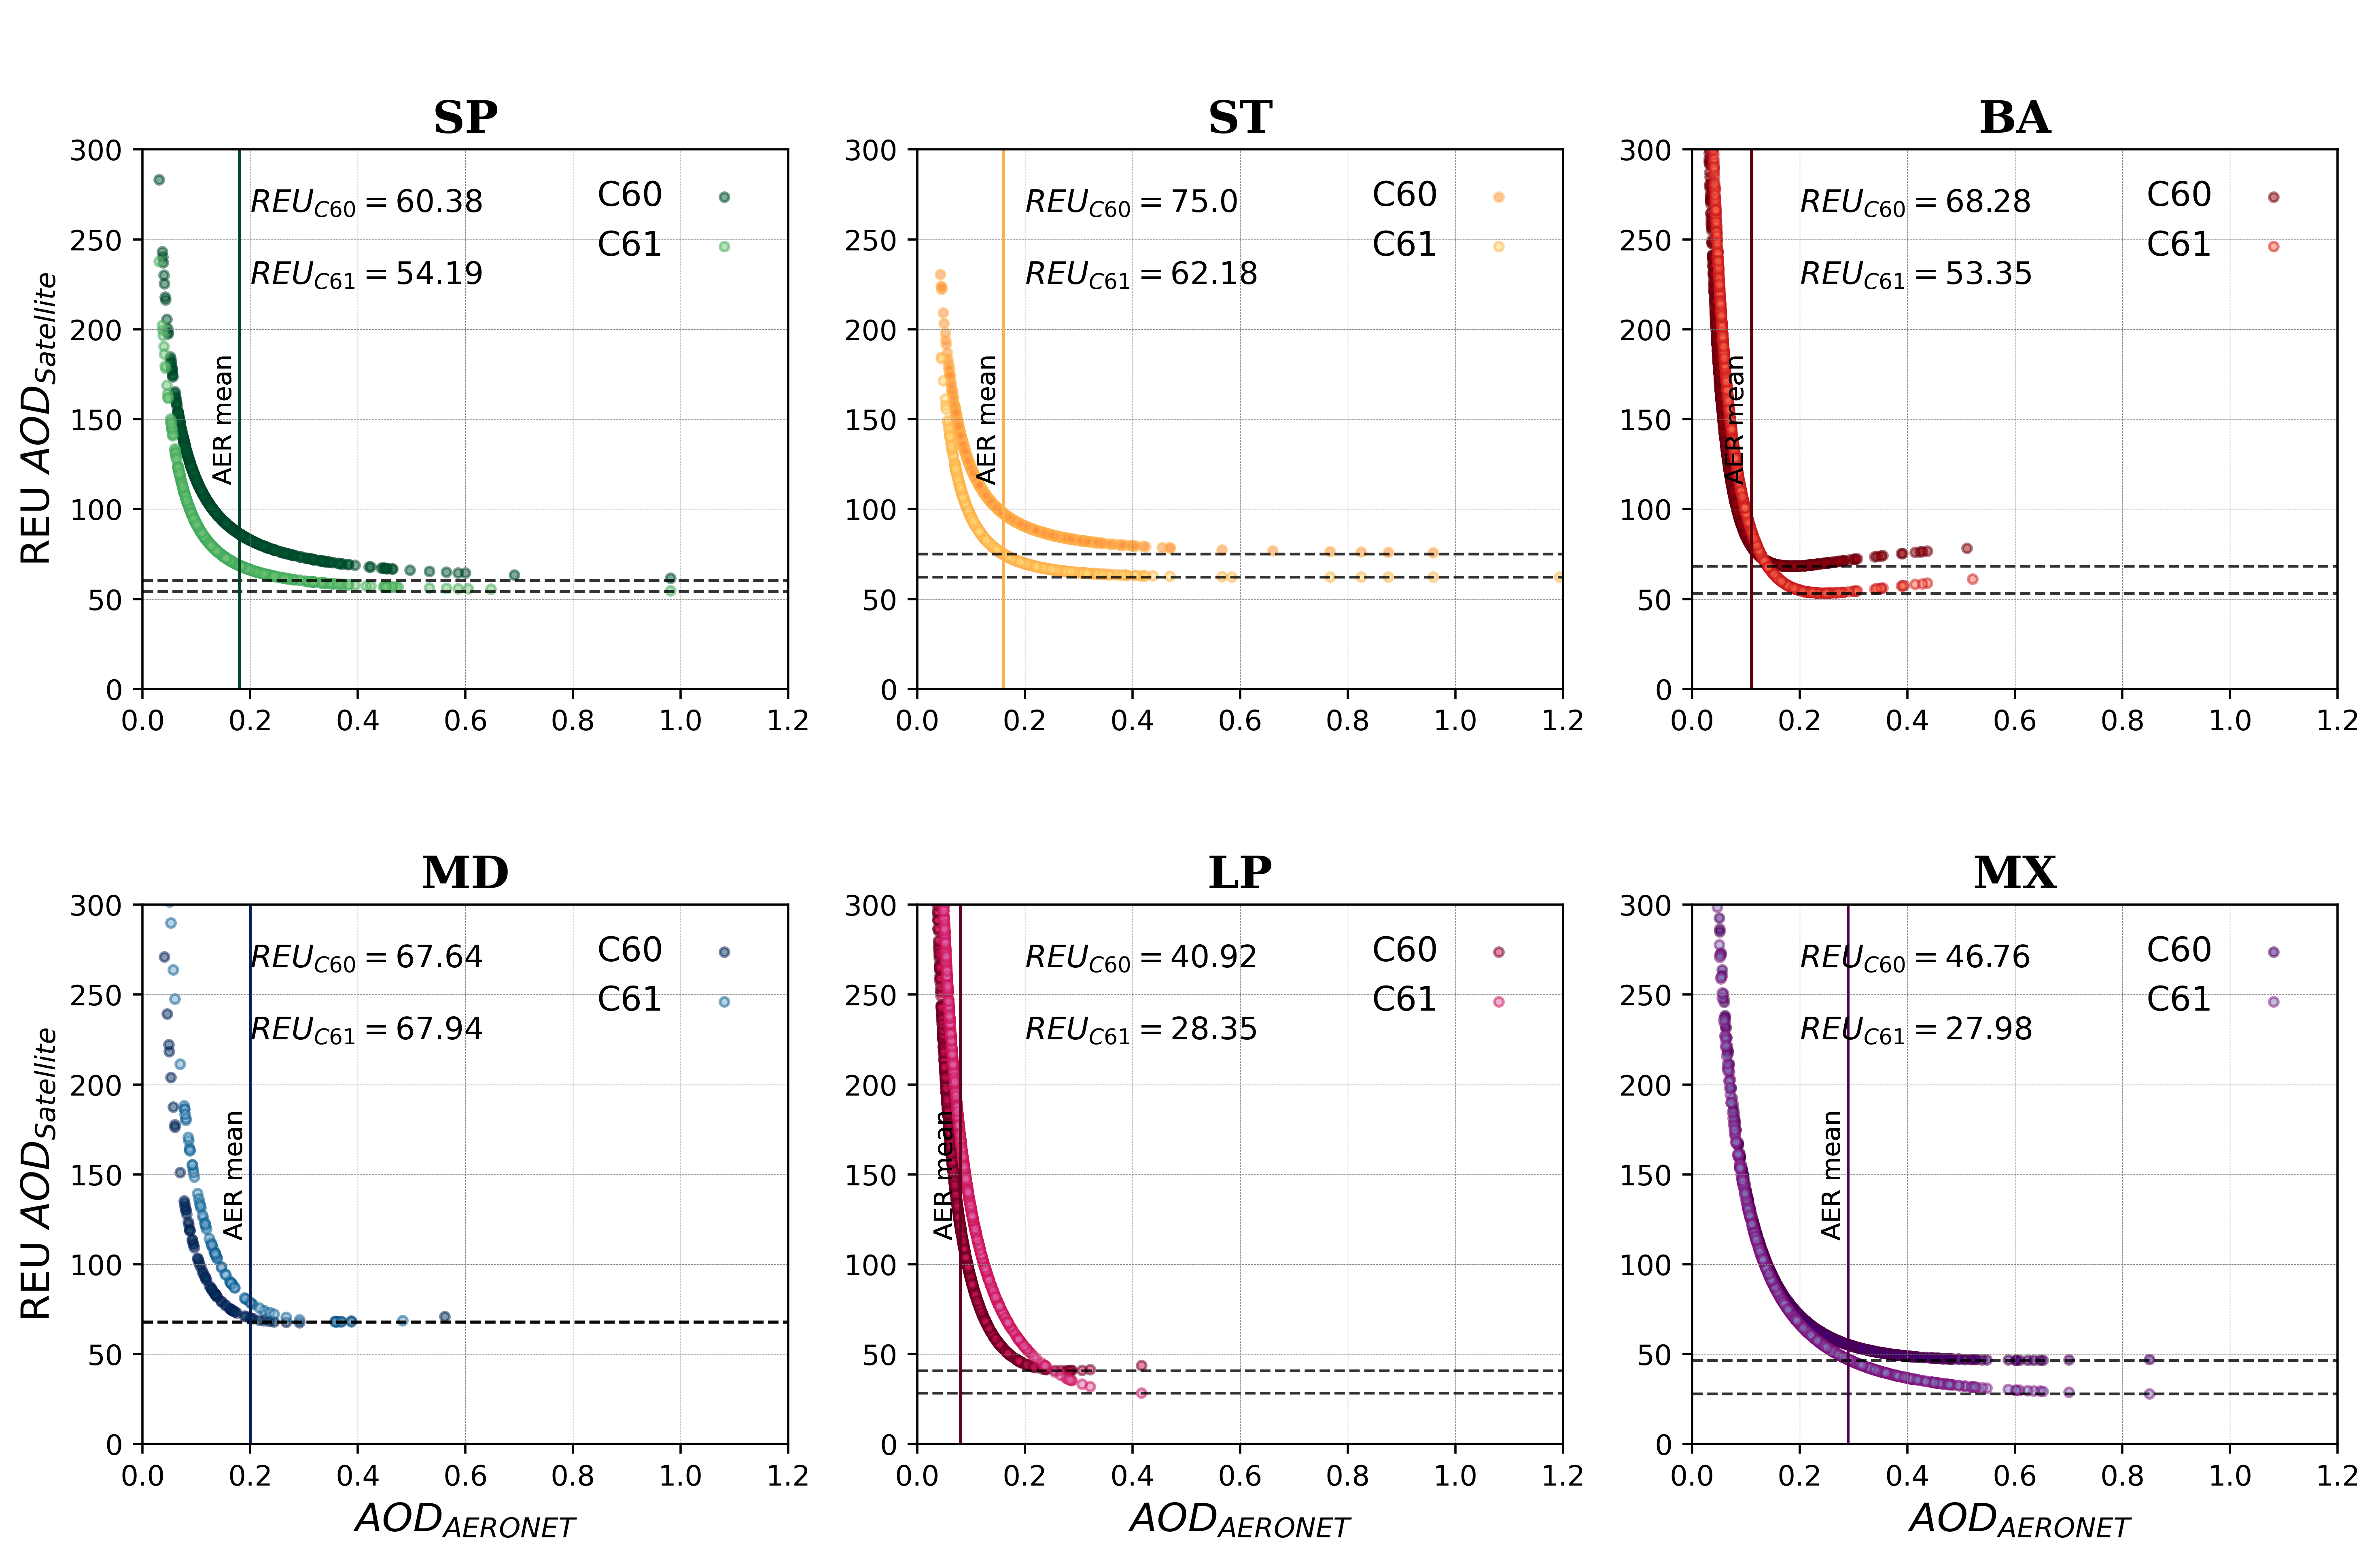

In [10]:
#"REUx 30min - Dia - C61 - Latam"
date_format='%Y-%m-%d'
nrows=2
ncols=3
plot ="no"
color_maiac_61 = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac_60 = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
edge_color_maiac_60 = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
edge_color_maiac_61 = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]

dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_C60C61/Latam"
resolucion_espaciotemporal_30 = "  "
prueba_reu_plot = REU_plot(path=dir_path_latam,resolucion_espaciotemporal=resolucion_espaciotemporal_30, date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_60=color_maiac_60, edge_color_maiac_60=edge_color_maiac_60,color_maiac_61=color_maiac_61, edge_color_maiac_61=edge_color_maiac_61)
prueba_reu_plot

### Comentarios
- Valores promedios de AODAERONET, SP tiene valores mas altos en C6.0 90%, mientras que para C6.2 70%.
- ST tiene valores mas altos en C6.0 100%, mientras que para C6.2 80%.
- Para BA la REU es igual a valores promedios con 75%
- Para MD es mas alta C6.1 a valores promedios con 80% mientras que para C6.0 es de 70%
- LP 110%c6.0 y 120C.1
- MX c6.1 50% Y c6.0 60%